# Fil rouge : les calculs de Le Verrier pour la découverte de Neptune

In [5]:
import numpy as np
from numpy import pi,exp,zeros,linspace,real,imag,reshape,cos
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,legend,xlabel,ylabel,subplot,title
import scipy
from scipy.integrate import odeint
%matplotlib inline    


$$\alpha=\dfrac{a}{a'}\leq 1$$
$$\rho=\dfrac{2\alpha}{1+\alpha^2}$$
$$f(\theta)=\dfrac{1}{\sqrt{1+\rho\cos(\theta)}}$$


In [6]:
alpha=0.3  #ratio of distances to Sun of 2 planets
rho=2*alpha/(1+alpha**2)
print('alpha={} rho={}'.format(alpha,rho))

alpha=0.3 rho=0.5504587155963302


In [7]:
def f(theta):
    return 1/(1+rho*cos(theta))**0.5

Décomposition en série de Fourier d'une fonction $f$ périodique
$$f(\theta)=\sum_{n=-\infty}^{n=+\infty} a_ne^{in\theta}$$
avec $$a_n=\dfrac{1}{2\pi}\int_0^{2\pi}f(\theta)e^{-in\theta}d\theta$$

 Approximation du calcul de $a_n$
       

Points de colocation : points de calculs pour l'approximation de  l'intégrale d'une fonction périodique (quadrature des trapèzes)
$$\int_0^{2\pi} f(\theta)d\theta\approx \frac{2\pi}{N}\sum_{k=0}^{N-1} f(\theta_k)$$
avec $$\theta_k=k\theta_0,\quad \theta_0=\dfrac{2\pi}{N},\quad k=0,\ldots,N$$

In [8]:
def Fourier_Coloc(Nint):
# collocation points for numerical integration
# compute N collocation points in [O,2 pi[
     y=linspace(0,2*pi,Nint+1)
     return y[:-1]

In [9]:
Nf=7;  # degree of the truncated Fourier  serie
Nbf=2*Nf+1; # number of terms in the Fourier serie
a=zeros((Nbf),dtype=complex)
Nint=16  # number of collocation points
Theta0= Fourier_Coloc(Nint) # collocation points xi
Y0=f(Theta0);            # f(xi)
for n in range(-Nf,Nf+1):
    s=0
    for k in range(Nint):
        s=s+Y0[k]*exp(-1j*n*Theta0[k])
    a[n+Nf]=s/Nint



 Troncature de la série $n=-N_f,\ldots,N_f$
        $$P_N f(\theta)=\sum_{n=-N_f}^{n=+N_f} a_ne^{in\theta}$$
          

In [10]:
def calc_PNf(a,theta,Nf):
    s=0.
    for n in range(-Nf,Nf+1):
        s+=a[n+Nf]*exp(1j*n*theta)
    return s
    

On compare graphiquement $f(\theta)$ et son approximation $P_Nf(\theta)$

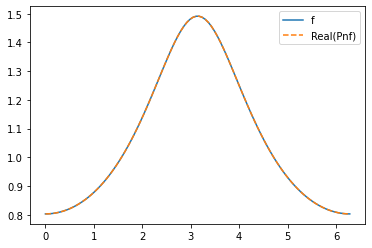

In [11]:
nbp=100 # number of abscissa points for plot
Theta_p=linspace(0,2*pi,nbp)
yp=f(Theta_p)  # the true function
pny=zeros((nbp,1),dtype=complex)  # the Fourier approximation
for k in range(nbp):
    pny[k]=calc_PNf(a,Theta_p[k],Nf)
plot(Theta_p,yp,label='f')
plot(Theta_p,real(pny),'--',label='Real(Pnf)')
legend()

Text(0.5, 0, '$\\theta$')

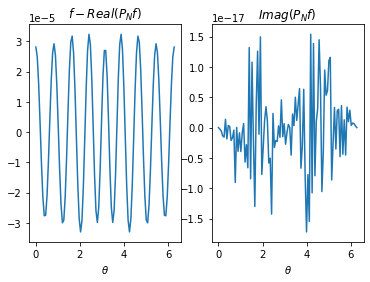

In [12]:
subplot(1,2,1)
plot(Theta_p,reshape(yp,(nbp,1))-real(pny),label='error')
title(r'$f-Real(P_Nf)$')
xlabel(r'$\theta$')
subplot(1,2,2)
plot(Theta_p,imag(pny),label='imag(Pnf)')
title(r'$Imag(P_Nf)$')
xlabel(r'$\theta$')

#plt.plot(xp,np.real(pny),'--',label='Real(Pnf)')


Plot des coeffcients en fonction de k

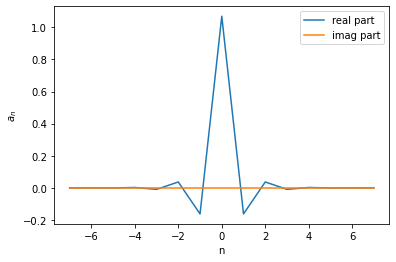

In [13]:
plot(range(-Nf,Nf+1),real(a),label='real part')
plot(range(-Nf,Nf+1),imag(a),label='imag part')
xlabel('n')
ylabel(r'$a_n$')
legend()

In [14]:
def calc_a(Nf,Nint):
    Nbf=2*Nf+1; # number of terms in the Fourier serie
    Theta0= Fourier_Coloc(Nint) # collocation points xi
    Y0=f(Theta0);            # f(xi)
    a=zeros((Nbf),dtype=complex)
    for n in range(-Nf,Nf+1):
        s=0
        for k in range(Nint):
            s=s+Y0[k]*exp(-1j*n*Theta0[k])
        a[n+Nf]=s/Nint
    return a



   
   <ul>
    <li>Mercure : 0,38 au
    <li>Vénus : 0,72 au
    <li>Terre : 1,00 au
    <li>Mars : 1,52 au
    <li>Jupiter : 5,21 au
    <li>Saturne : 9,54 au
    <li>Uranus : 19,18 au
    <li>Neptune : 30,11 au
    </ul>

In [15]:
# Exemple Saturne/Uranus
alpha=9.54/19.18
rho=2*alpha/(1+alpha**2)
print('alpha={} rho={}'.format(alpha,rho))

alpha=0.497393117831074 rho=0.797487818272156


Text(0, 0.5, '$\\rho$')

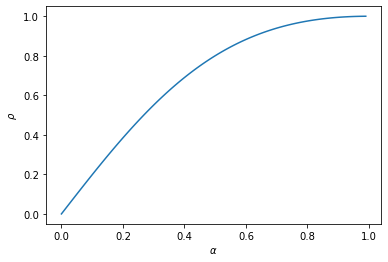

In [16]:
rho_=[]
alpha_=[k/nbp for k in range(nbp)]
rho_=[2*alpha/(1+alpha**2) for alpha in alpha_]
plot(alpha_,rho_) 
xlabel(r'$\alpha$')
ylabel(r'$\rho$')

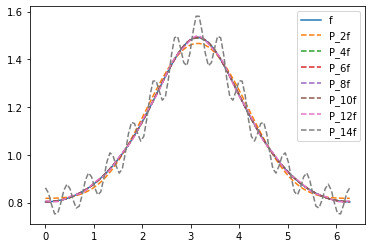

In [17]:
alpha=0.3
rho=2*alpha/(1+alpha**2)
nbp=100
Theta_p=linspace(0,2*pi,nbp)
yp=f(Theta_p)  # the true function
plot(Theta_p,yp,label='f')

Nint=16 # number of collocation points
Er_=[]
Nf_=range(2,15,2)  # Max degree of truncated Fourier serie
for Nf in Nf_:
    a=calc_a(Nf,Nint)
    pny=zeros((nbp,1),dtype=complex)  # the Fourier approximation
    for k in range(nbp):
        pny[k]=calc_PNf(a,Theta_p[k],Nf)
    plot(Theta_p,real(pny),'--',label='P_{}f'.format(Nf))
    # compute max error between f and P_Nf
    Er=norm(reshape(yp,(nbp,1))-real(pny),np.inf) 
    Er_.append(Er)
legend()

In [ ]:
plot(Nf_,Er_,'-o')
xlabel(r'$N_f$')
ylabel(r'$||f-P_Nf||_\infty$')
title('Truncated Fourier serie error for '+r'$N_{int}$'+'={}'.format(Nint))